In [2]:
source("/home/juan/Documentos/Rfunj/arranque_notebook.R")

In [3]:
#tema de graficación
library("ggplot2")
temajuan <- theme(
  legend.position = c(0.14, 0.80),
  legend.background = element_blank(),
  legend.title = element_text(size = 22),
  legend.box = "horizontal",
  legend.direction = "vertical",
  plot.title = element_text(size = 18),
  #legend.key.height = unit(0.1,"snpc"),
  legend.key.width  = unit(0.125,"snpc"),
  #legend.box.spacing = unit(0.1,"snpc"),
  legend.key = element_blank(),
  legend.spacing.x = unit(10, "pt"),
  legend.text = element_text(size = 24, margin = margin(t = 0, r= 5,b = 0, l = 3, unit = "pt")),
  axis.line = element_line(size = 0.5, lineend = "square"),
  axis.title = element_text(size = 24),
  axis.text.x = element_text(size = 18, colour = "black", angle = 0,  vjust = 1),
  axis.text.y = element_text(size = 18, colour = "black"),
  axis.ticks = element_line(size = 1, colour = "black"),
  panel.border = element_rect(size = 1, fill = NA)
)  

In [4]:
dirDatos <- "/home/juan/Documentos/Docencia/FEXPgit/FexpI/"
setwd(dirDatos)

In [5]:
dirGraf <- "/home/juan/Documentos/Docencia/fexpi/2024/DatosLabo3/Graf/"
setwd(dirGraf)
setwd(dirDatos)

# Análisis de Datos Laboratorio 3



**Encontrar la dimensión fractal que vincula masas con radios en esferas de papel.** Simplemente voy a hacer una gráfica m vs r (al revés de la que hacen uds.):

    
1. Voy a hacer un ajuste por persona de $log(m) \propto log(r)$ y voy a encontrar la dimensión $Dmr$ junto con su incerteza, $smr$.

1.  Un ajuste de $log(r) \propto log(m)$ y voy a encontrar $Drm$, junto con su incerteza, $srm$.

Voy a hacer una tabla para cada persona (así pueden comparar con sus propios resultados).

Buena suerte!

In [26]:
d <- read.csv(file = "tutti.csv", header = T, sep = ",")


In [27]:
colnames(d) <- c("m", "d", "Nombre"); #masa en g, diámetros en cm
head(d,3)
#d$d[d$Nombre == "Jeronimo Vega"] <- 10 * d$d[d$Nombre == "Jeronimo Vega"]

,m,d,Nombre
,<dbl>,<int>,<fct>
1,0.616,20,Nahuel
2,0.616,22,Nahuel
3,0.616,21,Nahuel


In [28]:
#definimos radios
d$r <- d$d /2;

#definimos volumen 
d$V <- (4*pi/3)*d$r^3; #cm^3

#definimos densidad volumétrica
d$rho <- d$m / d$V; #g/cm^3
head(d, 3)
range(d$r)

,m,d,Nombre,r,V,rho
,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,0.616,20,Nahuel,10.0,4188.790,0.0001470592
2,0.616,22,Nahuel,11.0,5575.280,0.0001104877
3,0.616,21,Nahuel,10.5,4849.048,0.0001270352


[1]  1 29

In [33]:
#ploteamos modelo
gmr <- ggplot() + 
geom_point(data = d, aes(x = r, y = m,colour = Nombre), size = 3) + 
geom_smooth(data = d, aes(x = r, y = m, colour = Nombre), method = "lm",
            formula = "y ~ x", alpha = 0.1) +
geom_smooth(data = d, aes(x = r, y = m, lty = "Todos"), colour = "Black", lwd = 3, method = "lm",
            formula = "y ~ x") +
scale_linetype_manual(values = c("Todos" = 1), name = NULL) + 
#geom_line(data = modelo_d3, aes(x = r, y = m_min, colour = "3d")) + 
#scale_colour_manual(values = c("Datos" = "Black", "3d" = "Black"),
#                    labels = list(TeX("Datos Experimentales"), TeX("$m \\propto \\frac{4 \\pi}{3}r^3$") ) ) + 
xlab("r (cm) [escala log]") + ylab("m (g) [escala log]") + ggtitle("Nombres y unidades en los Ejes") + temajuan + 
#scale_y_continuous(trans = "log10", limits = c(0.4,10),breaks = c(0.5,seq(1,10,1) ), labels = c(0.5,seq(1,10,1) ) ) + 
#scale_x_continuous(trans = "log10", breaks = seq(0.5,3,0.5))  + 
theme(legend.position = c(0.15,0.75), legend.box = "vertical")

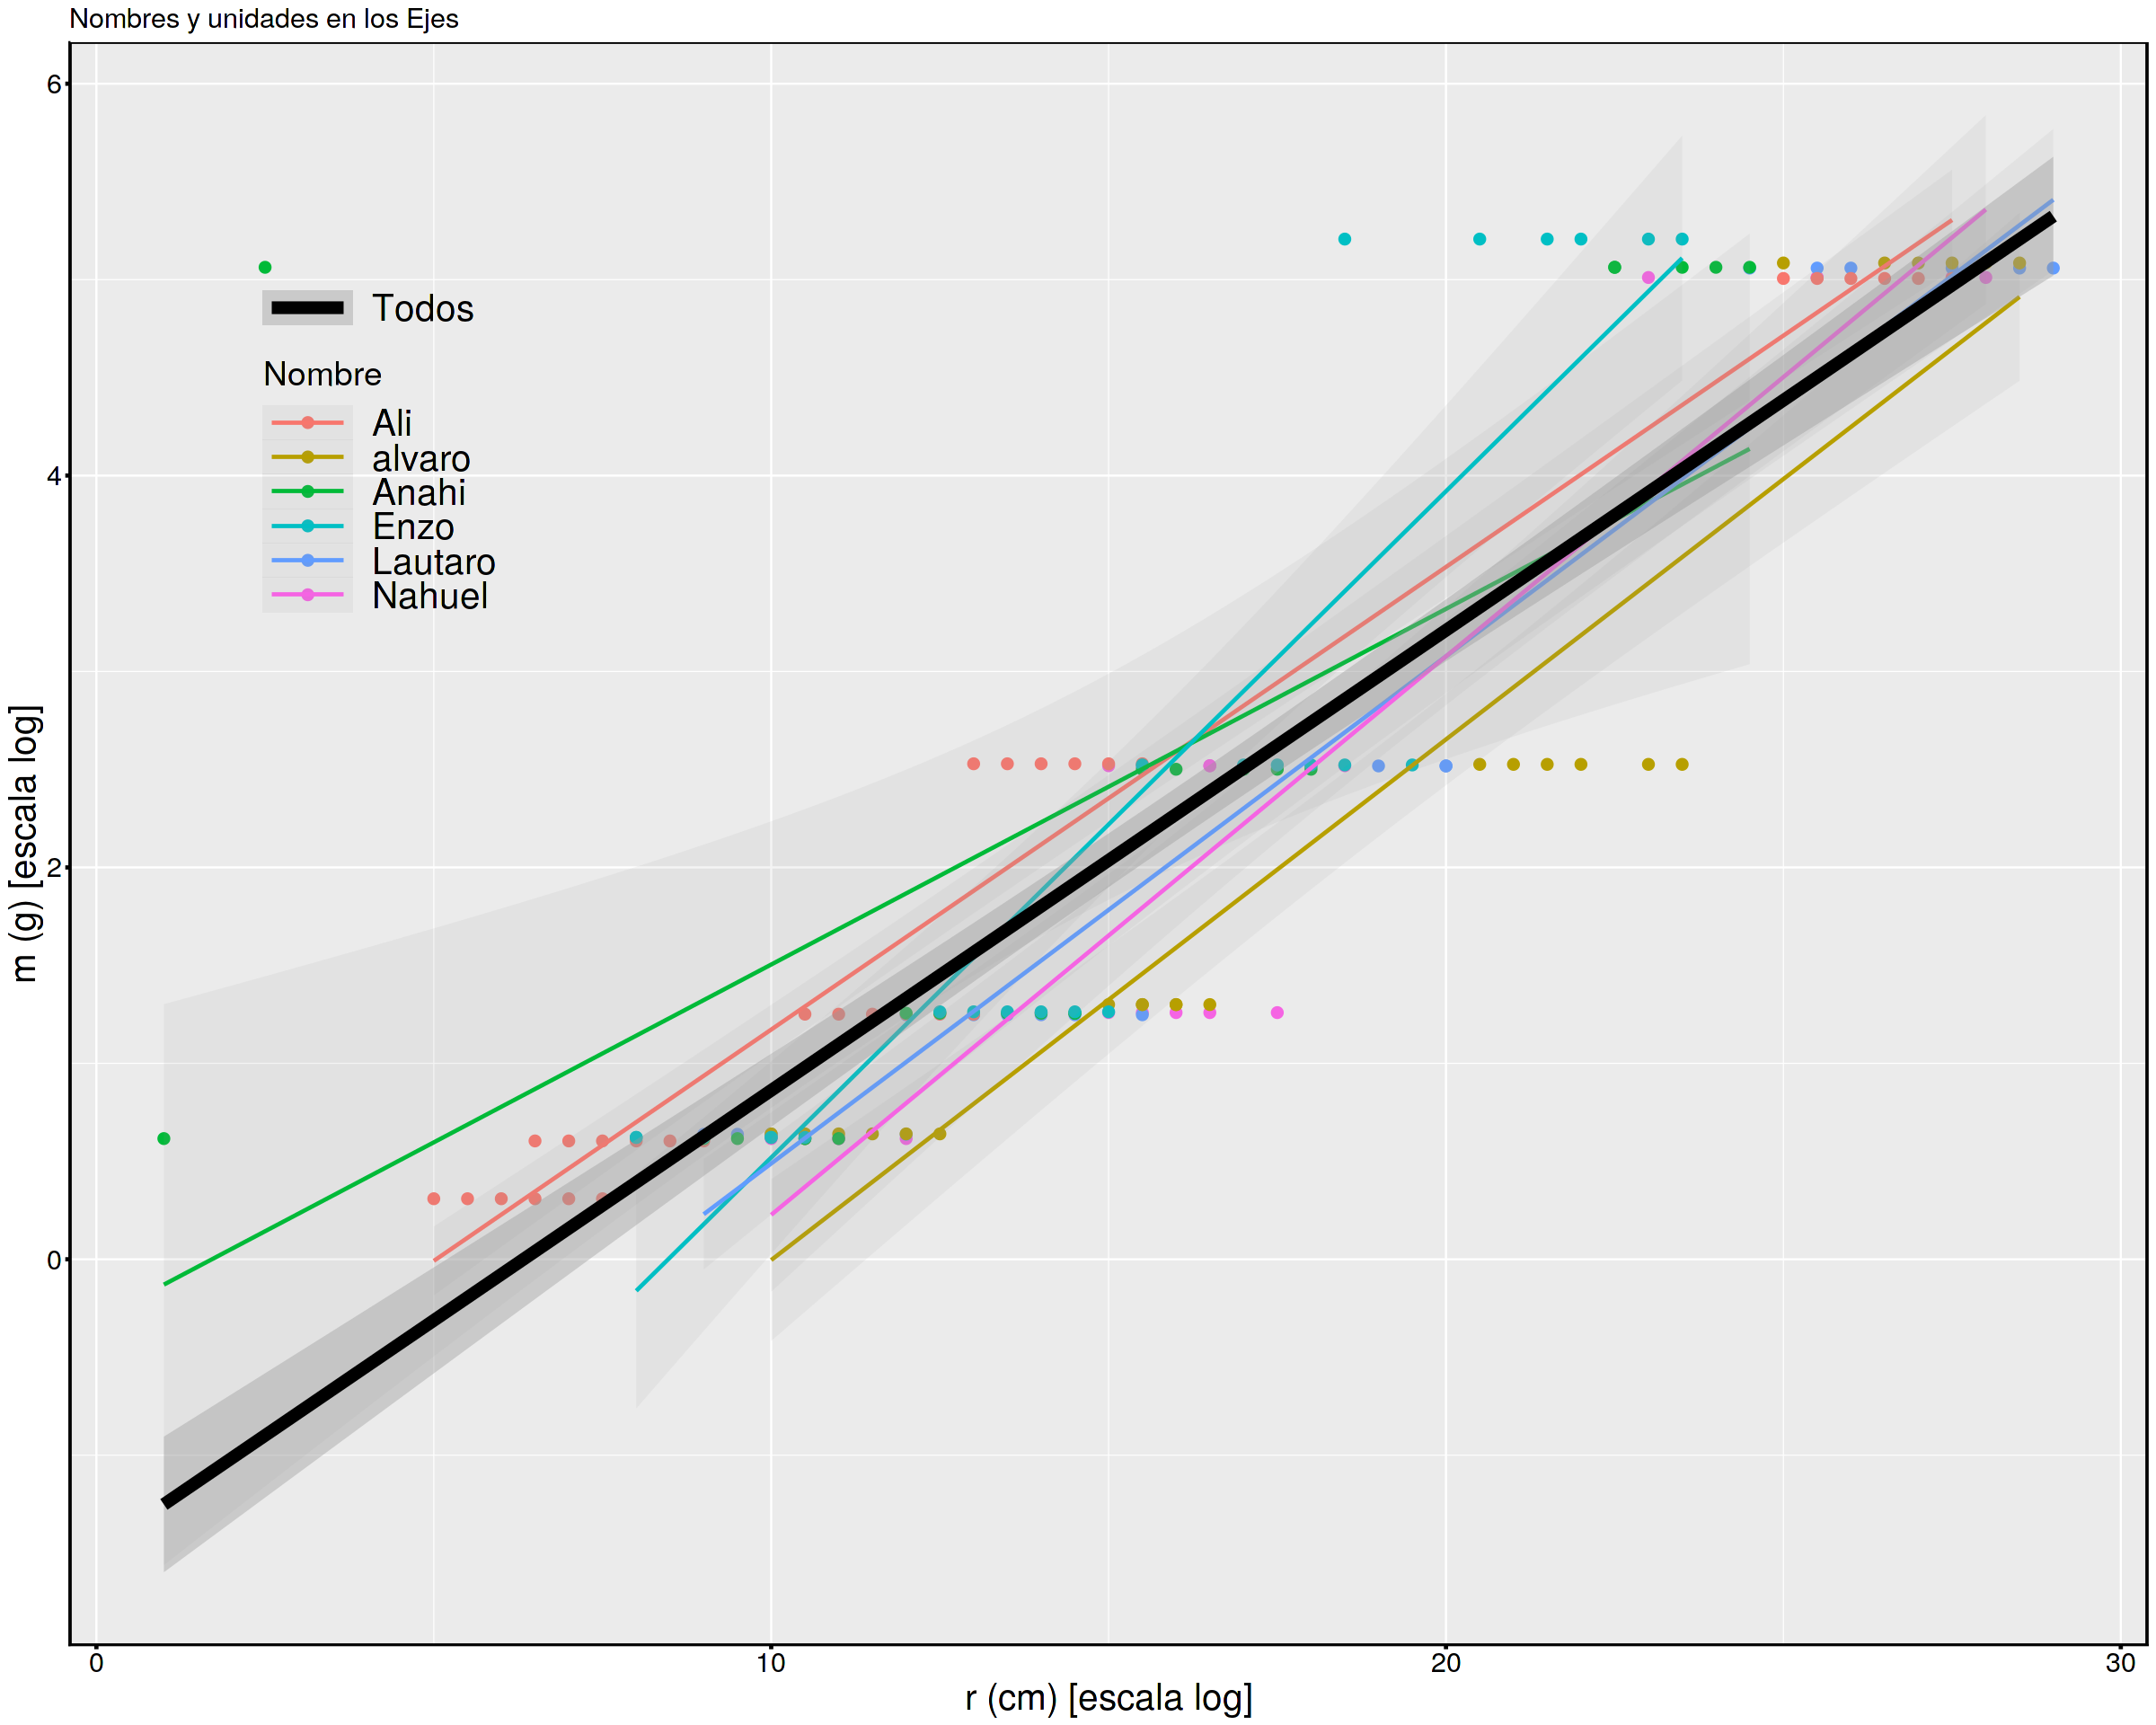

In [34]:
fig(20,16)
show(gmr)

In [35]:
Dmr  <- vector(mode = "numeric")
smr <- vector(mode = "numeric")
Drm  <- vector(mode = "numeric")
srm <- vector(mode = "numeric")

Nombre <- vector(mode = "character")

for(i in unique(d$Nombre)){
di <- d[d$Nombre == i, ]
    
a <- summary.lm(lm(log10(di$m) ~ log10(di$r)))
Dmr <- c(Dmr, a$coefficients[2,1])
smr <- c(smr, a$coefficients[2,2])    

a <- summary.lm(lm(log10(di$r) ~ log10(di$m)))
Drm <- c(Drm, 1/a$coefficients[2,1])
srm <- c(srm,  (1/a$coefficients[2,1]^2) * a$coefficients[2,2])    

    
Nombre <- c(Nombre, i) 
}

resumen <- data.frame(Nombre = Nombre, Dmr = Dmr, Drm = Drm , smr = smr, srm = srm)
head(resumen, 16)

,Nombre,Dmr,Drm,smr,srm
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nahuel,2.3162580,2.595397,0.17546643,0.19661239
2,Lautaro,2.0438263,2.159578,0.10369913,0.10957213
3,alvaro,2.2373943,2.316776,0.08985052,0.09303839
4,Ali,1.8696514,2.000355,0.09342122,0.09995213
5,Anahi,0.4970539,2.511390,0.21333219,1.07787175
6,Enzo,2.3067272,2.535761,0.15496605,0.17035255


In [36]:
srm[15] 
a$coefficients[2,2] / a$coefficients[2,1]^2

[1] NA

[1] 0.1703526

Las columnas son:

* Nombre: el nombre de cada persona del curso.

* Dmr: la pendiente de la regresión lineal con la masa m en el eje vertical y el radio r en el horizontal, con ambos ejes con log10 (que identificamos con la dimensión fractal).

* Drm: 1 / la pendiente de la regresión lineal con el radio r el eje vertical y la masa m en el horizontal, obvio que ambos ejes con log10.

* smr: la desviación estándar de la pendiente

* srm: la desviación estándar de Drm.

***Importante***: Ver que en general dar vueltas los ajustes no hace lo que ingenuamente resultaría obvio:

$$
Dmr \neq Drm
$$

Esto es porque los ajustes tienen *detalles*.

Álvaro, que le pone poca gana, debe tener varios outliers que le ponen las pendientes locas. Franco tb. Revisen los datos. Si pueden, hacen bolas de nuevo y las miden con la regla, pero no es indispensable.

In [37]:
a <- summary.lm(lm(log(d$d/2) ~ log(d$m) ))
a$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.4522071,0.02861132,85.70758,2.154329e-127
log(d$m),0.4518653,0.02912906,15.51253,9.284553e-33


# One by one

In [38]:
d[d$Nombre == "Lautaro", ]

,m,d,Nombre,r,V,rho
,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>
24,0.638,21,Lautaro,10.5,4849.048,1.315722e-04
25,0.638,18,Lautaro,9.0,3053.628,2.089318e-04
26,0.638,20,Lautaro,10.0,4188.790,1.523113e-04
27,0.638,19,Lautaro,9.5,3591.364,1.776484e-04
28,0.638,20,Lautaro,10.0,4188.790,1.523113e-04
29,0.638,24,Lautaro,12.0,7238.229,8.814310e-05
30,1.248,31,Lautaro,15.5,15598.531,8.000753e-05
31,1.248,24,Lautaro,12.0,7238.229,1.724179e-04
32,1.248,28,Lautaro,14.0,11494.040,1.085780e-04


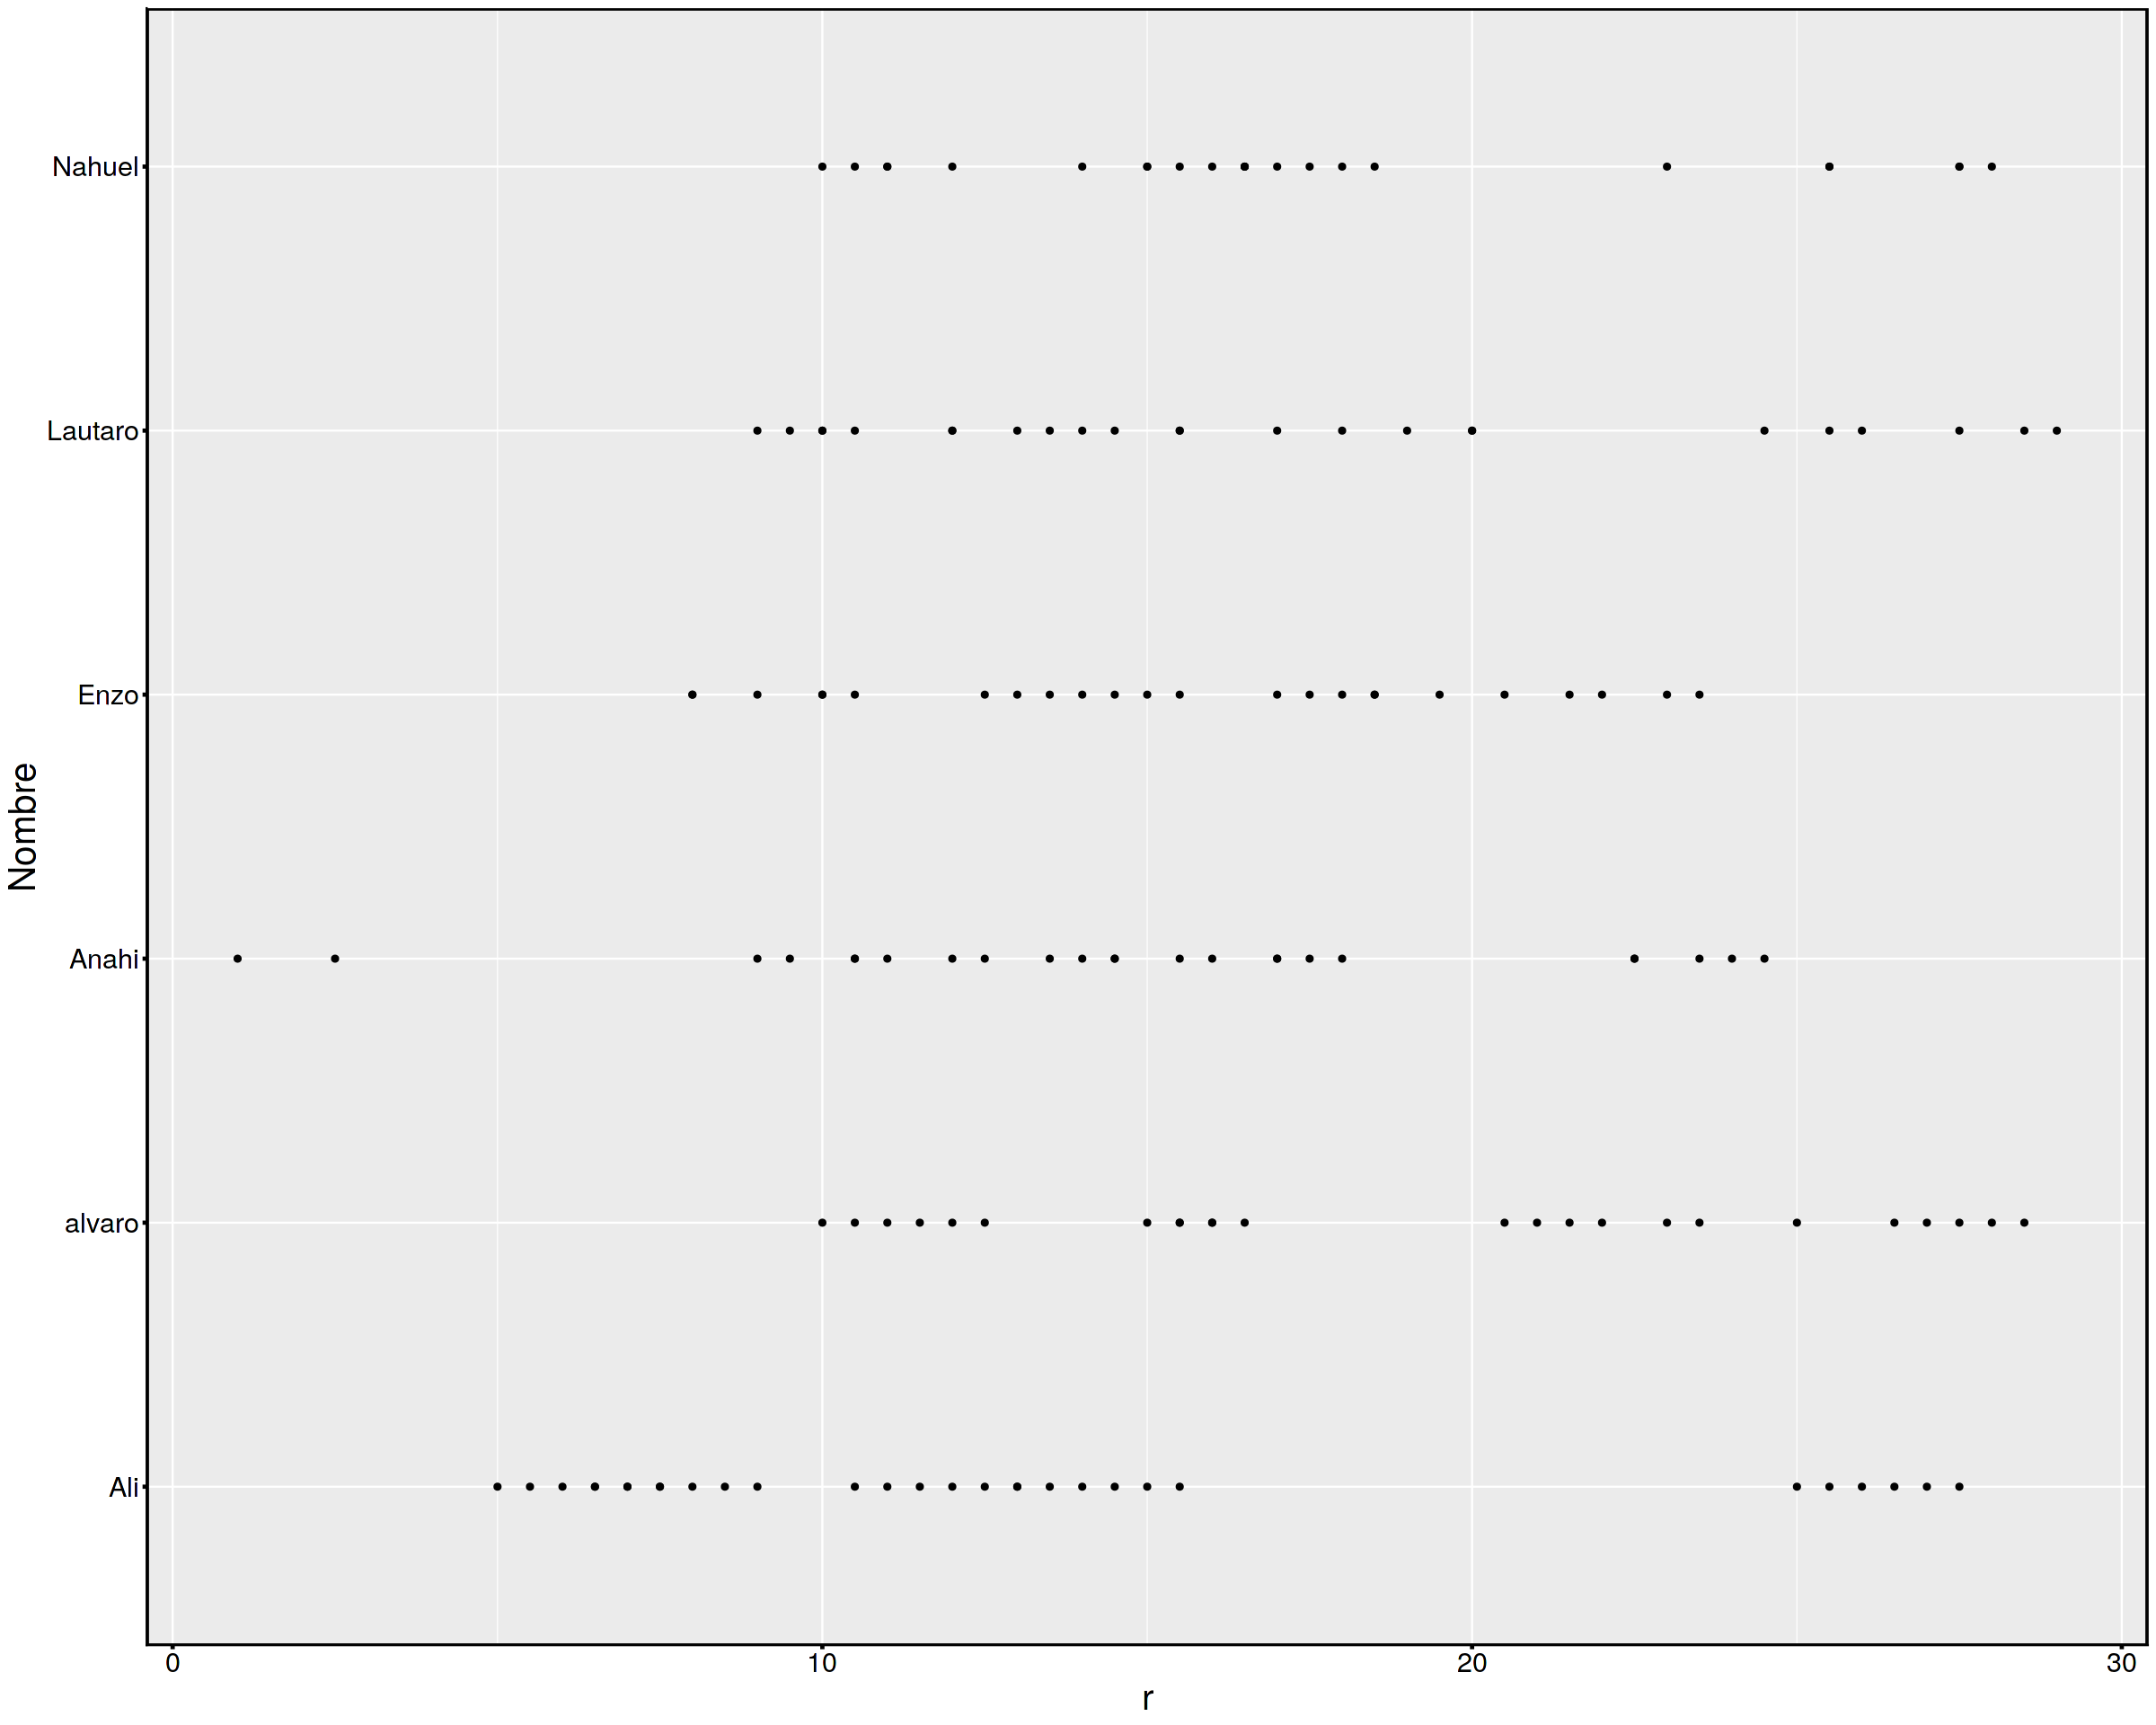

In [39]:
ggplot(data = d) + 
geom_point(aes(y = Nombre, x = r)) +
temajuan + 
theme(axis.text.y  = element_text()) 


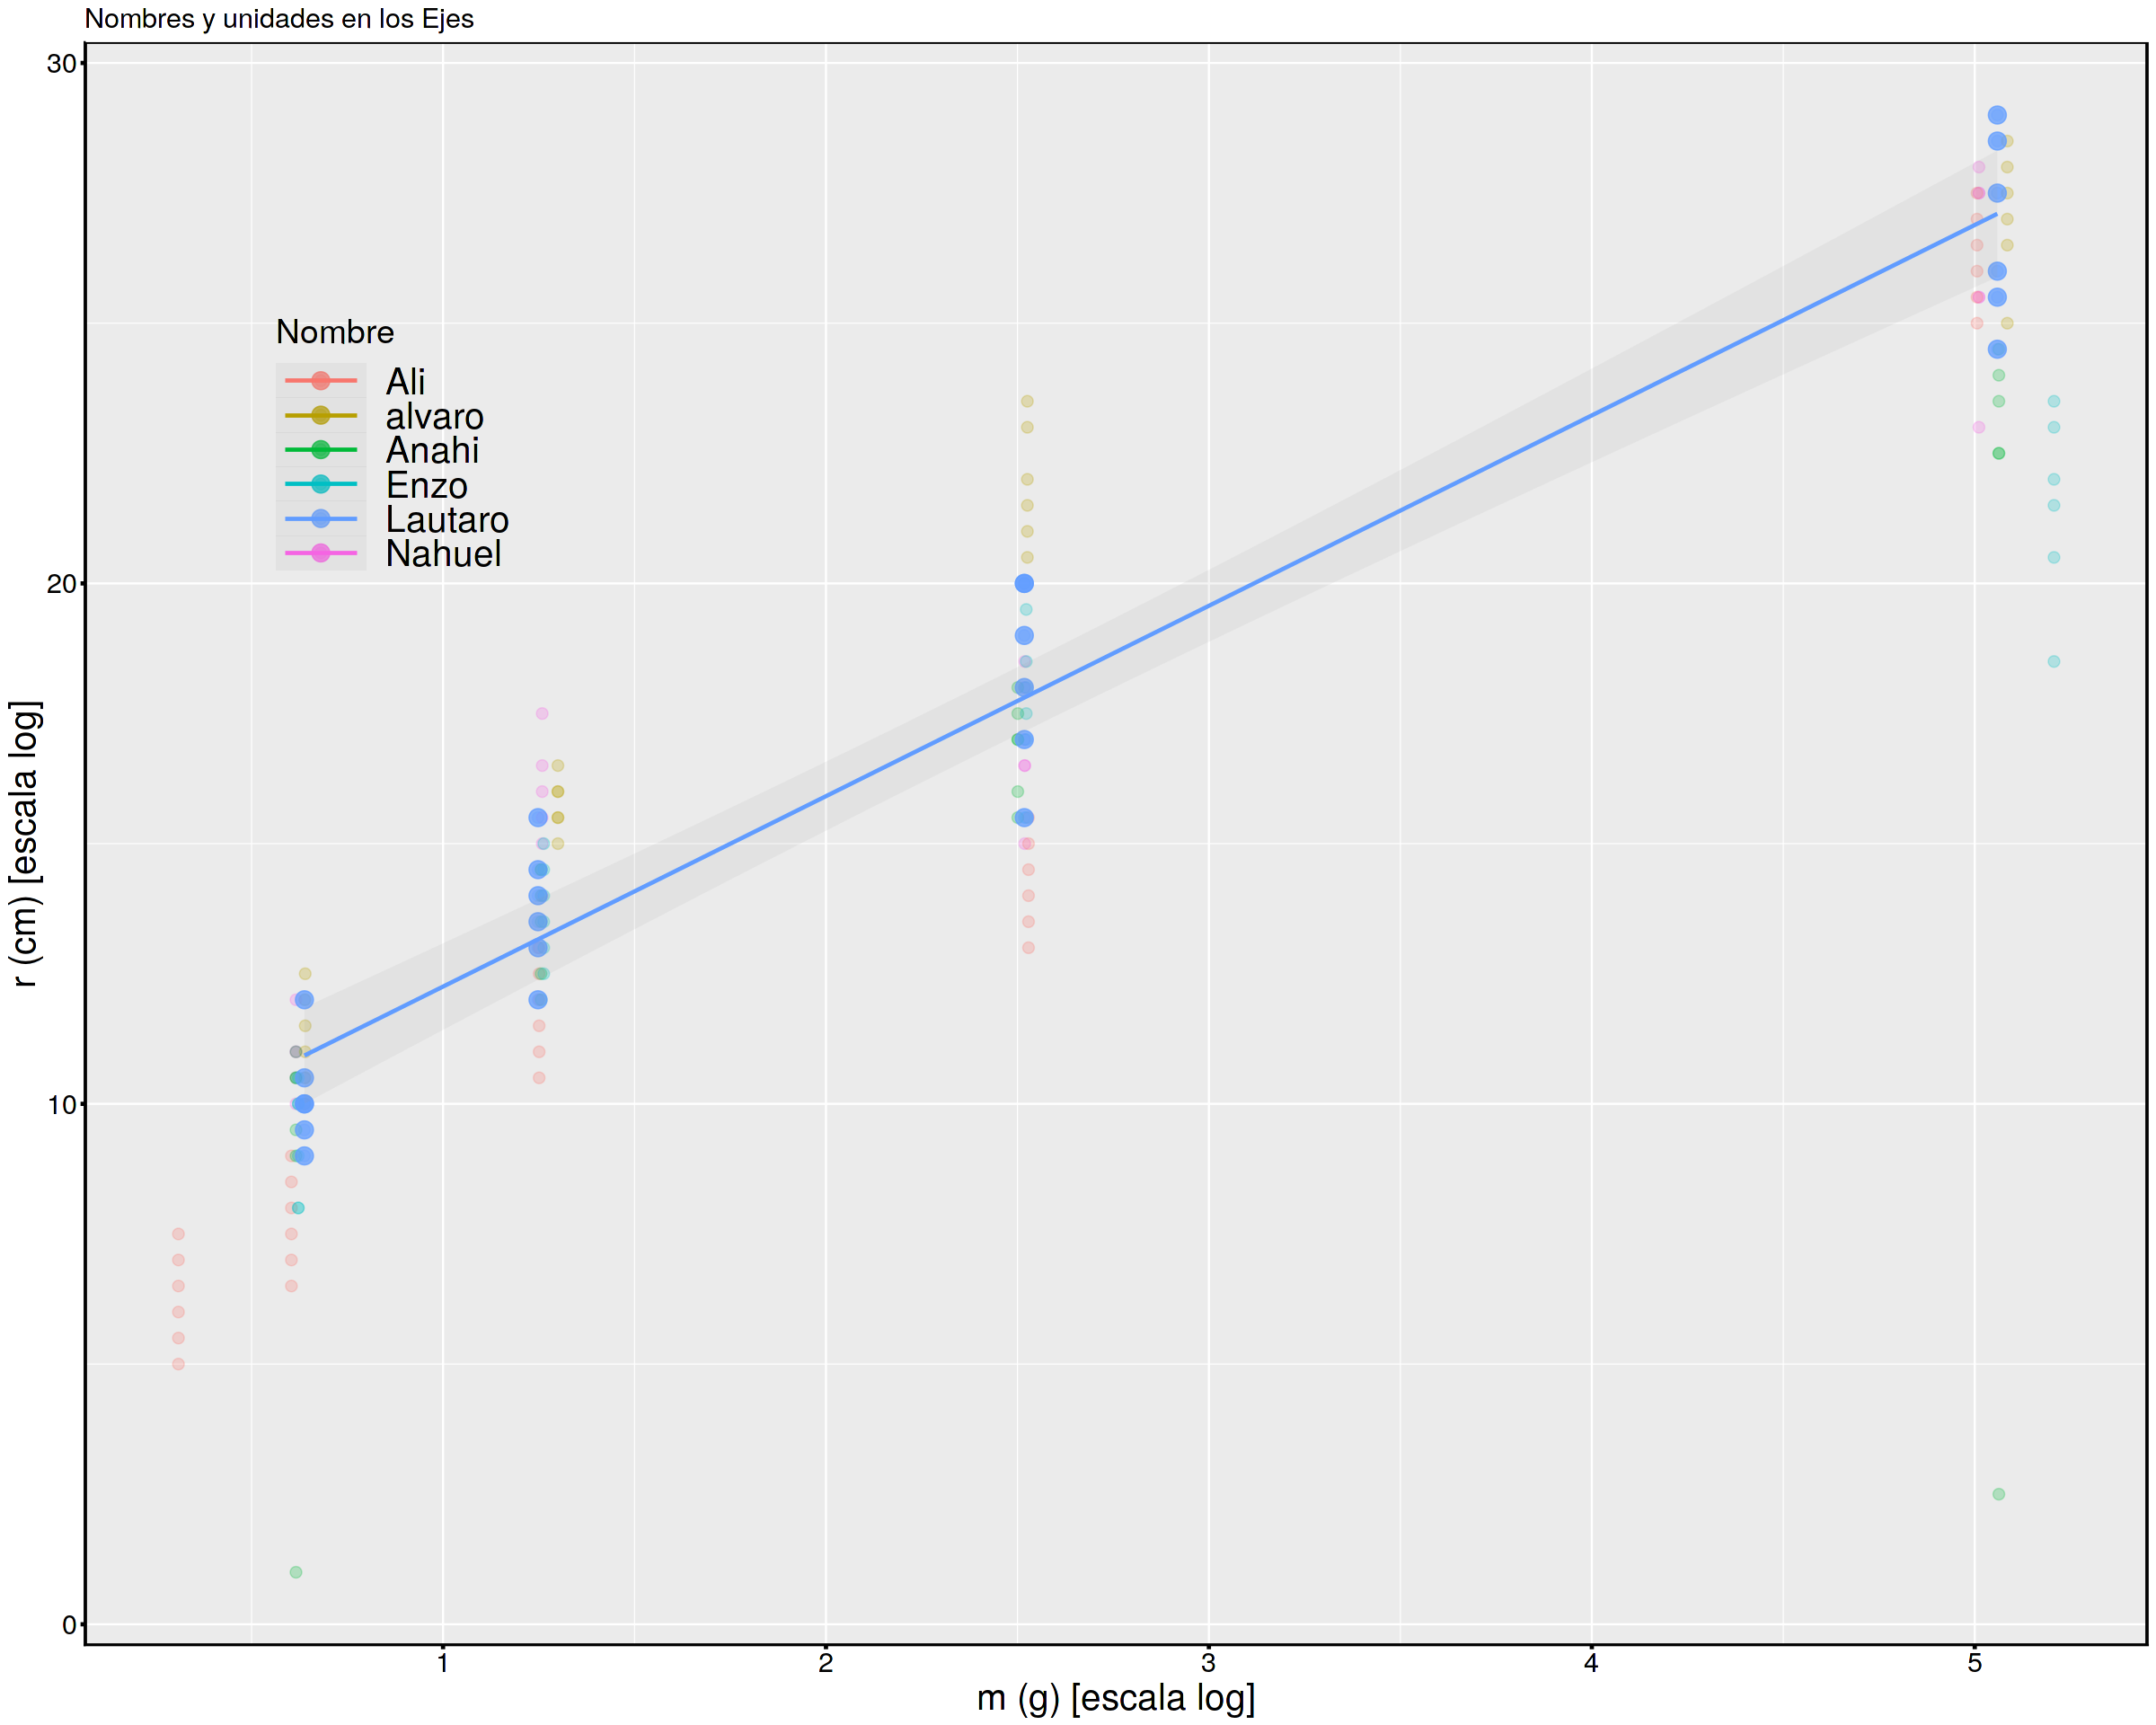

In [47]:
who = "Lautaro";

ggplot() + 
geom_point(data = d, aes(x = m, y = r,colour = Nombre), size = 3, alpha = 0.25) +
geom_point(data = d[d$Nombre == who, ], aes(x = m, y = r,colour = Nombre), size = 5, alpha = 0.75) +
geom_smooth(data = d[d$Nombre == who, ], aes(x = m, y = r, colour = Nombre), method = "lm",
            formula = "y ~ x", alpha = 0.1) +
#geom_point(data = d[d$Nombre == "Estefanía", ], aes(x = m, y = r,colour = Nombre), size = 3, alpha = 1) +
#geom_smooth(data = d[d$Nombre == "Estefanía", ], aes(x = m, y = r, colour = Nombre), method = "lm",
#            formula = "y ~ x", alpha = 0.1) +
#geom_abline(aes(slope = 1/3, intercept = 0), lwd = 2, colour = "DeepSkyBlue2") +
#geom_abline(aes(slope = 1/2, intercept = 0), lwd = 2, colour = "DeepSkyBlue4") +
#geom_abline(aes(slope = 1/2.5, intercept = 0), lwd = 2, colour = "DeepSkyBlue3") +



#geom_line(data = modelo_d3, aes(x = r, y = m_min, colour = "3d")) + 
#scale_colour_manual(values = c("Datos" = "Black", "3d" = "Black"),
#                    labels = list(TeX("Datos Experimentales"), TeX("$m \\propto \\frac{4 \\pi}{3}r^3$") ) ) + 
ylab("r (cm) [escala log]") + xlab("m (g) [escala log]") + ggtitle("Nombres y unidades en los Ejes") + temajuan + 
#scale_x_continuous(trans = "log10", limits = c(min(d$m)*0.95,max(d$m)*1.05),breaks = c(0.5,seq(1,10,1) ), labels = c(0.5,seq(1,10,1) ) ) + 
#scale_y_continuous(trans = "log10" , breaks = seq(0.5,3,0.5))  + 
theme(legend.position = c(0.15,0.75), legend.box = "vertical")

In [ ]:
ggplot() + 
geom_point(data = d, aes(x = r, y = rho, size = m)) + 
xlab("r (cm) ") + ylab(TeX("$\\rho (g cm^{-3})$")) +
                                   temajuan + 
                                   
scale_y_continuous(trans = "log10", limits = c(0.4,10)) +
scale_x_continuous(trans = "log10") 
           